In [1]:
from zdm import survey
from zdm import cosmology as cos
from zdm import loading as loading
from zdm.misc_functions import *
import zdm.iteration as it
from zdm.MCMC import calc_log_posterior
from astropy.cosmology import Planck18
import scipy.stats as st

/fred/oz002/jhoffmann/FRB_library/zdm/.zdm_env/lib64/python3.9/site-packages/FRB-0.1.dev0-py3.9.egg/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


In [2]:
best_fits = []
labels = []

# labels.append(r"Without $P(N)$")
# best_fits.append({'sfr_n': 1.7239940770200821, 'alpha': 0.03354380146791099, 'lmean': 2.204000901130436, 'lsigma': 0.4194457054614964, 'lEmax': 40.89306952884742, 'gamma': -0.9147808102620911, 'H0': 69.89381218175734})
# labels.append(r"With $P(N)$")
# best_fits.append({'sfr_n': 0.6805153011445556, 'alpha': 1.1664888956075008, 'lmean': 2.214495470184592, 'lsigma': 0.41266208218412304, 'lEmax': 40.89247772946217, 'gamma': -0.579389996250038, 'H0': 67.24521833790101})

# labels.append("Emin 30")
# best_fits.append({'sfr_n': 0.8730647734716648, 'alpha': 1.3667143745559975, 'lmean': 2.152322736839686, 'lsigma': 0.37750409151503417, 'lEmax': 40.939981899866524, 'lEmin': 30.0, 'gamma': -0.7088133056534759, 'H0': 60.53695389677314})
# labels.append("Emin 35.0")
# best_fits.append({'sfr_n': 0.8730647734716648, 'alpha': 1.3667143745559975, 'lmean': 2.152322736839686, 'lsigma': 0.37750409151503417, 'lEmax': 40.939981899866524, 'lEmin': 35.0, 'gamma': -0.7088133056534759, 'H0': 60.53695389677314})
# labels.append("Emin 39.3")
# best_fits.append({'sfr_n': 0.8730647734716648, 'alpha': 1.3667143745559975, 'lmean': 2.152322736839686, 'lsigma': 0.37750409151503417, 'lEmax': 40.939981899866524, 'lEmin': 39.30562511434135, 'gamma': -0.7088133056534759, 'H0': 60.53695389677314})

labels.append('Default') 
# BASE_Pn_Emin2
# best_fits.append({'sfr_n': 0.9026036227113492, 'alpha': 1.9659332595449275, 'lmean': 2.1505112506090596, 'lsigma': 0.40082850868250053, 'lEmax': 41.16252016229329, 'lEmin': 39.28731052764138, 'gamma': -0.9031017833455636, 'H0': 62.49923979089554})
# BASE_Pn_Emin3
best_fits.append({'sfr_n': 0.6858762799998724, 'alpha': 1.7665198706279686, 'lmean': 2.074825172832976, 'lsigma': 0.4003714831421404, 'lEmax': 41.13739600201252, 'lEmin': 39.551691554143936, 'gamma': -1.0348224611860115, 'H0': 61.22965004043496})

labels.append(r'No $P(N)$') 
# BASE_Emin
# best_fits.append({'sfr_n': 1.8342406907210933, 'alpha': 1.8333854125000386, 'lmean': 2.192135707972721, 'lsigma': 0.38705389085781317, 'lEmax': 41.27201813996426, 'lEmin': 39.22622840814371, 'gamma': -1.32556116225346, 'H0': 65.93010516823207})
# BASE_Emin2
best_fits.append({'sfr_n': 0.9220453292244029, 'alpha': 1.9665575986192303, 'lmean': 2.1697678244039507, 'lsigma': 0.4004711466734019, 'lEmax': 41.27980009920434, 'lEmin': 39.55157205914853, 'gamma': -1.1669093101364796, 'H0': 60.75313059347925})

labels.append('Power law luminosity') 
# BASE_Pn_Emin_lf0_2
# best_fits.append({'sfr_n': 0.8243110172317012, 'alpha': 1.966510462846641, 'lmean': 2.104834968050141, 'lsigma': 0.35782906919261437, 'lEmax': 41.949910923891665, 'lEmin': 39.553148247527204, 'gamma': -1.523425041301644, 'H0': 62.838979610089254})
# BASE_Pn_Emin_lf0_3
best_fits.append({'luminosity_function': 0, 'sfr_n': 0.6394580641840564, 'alpha': 1.4994594120025269, 'lmean': 2.2069852969103194, 'lsigma': 0.3948130422371279, 'lEmax': 41.98757138431465, 'lEmin': 39.832245449183006, 'gamma': -1.6356065332762983, 'H0': 54.76092289204533})

labels.append(r'Spectral index $\alpha$') 
# BASE_Pn_Emin_a0
# best_fits.append({'sfr_n': 0.5840546407017521, 'alpha': 1.0328250440989613, 'lmean': 2.0444766422118867, 'lsigma': 0.4145942723392604, 'lEmax': 41.33254292131154, 'lEmin': 39.296674853084184, 'gamma': -1.0066151202867784, 'H0': 54.04900450931119})
# BASE_Pn_Emin_a0_2
best_fits.append({'alpha_method': 0, 'sfr_n': 0.48361331499480953, 'alpha': 0.7001548478311429, 'lmean': 2.038232098468842, 'lsigma': 0.40156638909400866, 'lEmax': 41.407047548622444, 'lEmin': 39.80505829183909, 'gamma': -1.0558946846835933, 'H0': 54.95225789822551})

labels.append(r'Source evolution') 
# BASE_Pn_Emin_se1_2
best_fits.append({'source_evolution': 1, 'sfr_n': 0.21404999273027164, 'alpha': 0.16706637227955395, 'lmean': 2.2706776616140747, 'lsigma': 0.40352115870627303, 'lEmax': 41.241223230762785, 'lEmin': 39.55207551307333, 'gamma': -0.7668430824821318, 'H0': 60.51692059561489})


In [3]:
s_names = [
    # "FAST2",
    # "FAST2_old"
    "DSA",
    "FAST",
    "CRAFT_class_I_and_II", 
    "private_CRAFT_ICS_892", 
    "private_CRAFT_ICS_1300_14", 
    "private_CRAFT_ICS_1632_14", 
    "parkes_mb_class_I_and_II"
]

states = []
survey_list = []
grid_list = []

for best_fit in best_fits:
    state = parameters.State()
    state.set_astropy_cosmo(Planck18) 
    state.update_params(best_fit)
    # state.update_param('luminosity_function', 2)
    # state.update_param('alpha_method', 0)
    # state.update_param('sfr_n', 1.36)
    state.update_param('alpha', 1.5)
    # state.update_param('lmean', 1.97)
    # state.update_param('lsigma', 0.92)
    # state.update_param('lEmax', 41.3)
    # state.update_param('gamma', -0.63)
    # state.update_param('H0', 70.0)
    # state.update_param('DMhalo', 50.0)

    states.append(state)

    if len(s_names) != 0:
        surveys, grids = loading.surveys_and_grids(survey_names = s_names, init_state=state, repeaters=False, nz=500, ndm=1400)
    else:
        surveys = []
        grids = []

    survey_list.append(surveys)
    grid_list.append(grids)

Loading survey: private_CRAFT_ICS_1300_14
Loading survey: private_CRAFT_ICS_1300_14 from private_CRAFT_ICS_1300_14.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  15  FRBs starting from 0
Initialised surveys
Initializing igamma_spline for gamma=-1.0348224611860115
Initialised grids
Loading survey: private_CRAFT_ICS_1300_14
Loading survey: private_CRAFT_ICS_1300_14 from private_CRAFT_ICS_1300_14.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  15  FRBs starting from 0
Initialised surveys
Initializing igamma_spline for gamma=-1.1669093101364796


KeyboardInterrupt: 

In [ ]:
for i in range(len(survey_list)):
    newC, llc = it.minimise_const_only(None, grid_list[i], survey_list[i])
    llsum = 0

    for j in range(len(survey_list[i])):
        s = survey_list[i][j]
        g = grid_list[i][j]

        g.state.FRBdemo.lC = newC

        llsum += it.get_log_likelihood(g,s,Pn=False, psnr=False)
    
        expected=it.CalculateIntegral(g.rates,s)
        expected *= 10**g.state.FRBdemo.lC
        observed=s.NORM_FRB

        print(s.name + " - expected, observed: " + str(expected) + ", " + str(observed))

    print(labels[i], llsum)

pdm 62489.94833616307
private_CRAFT_ICS_1300_14 - expected, observed: 5.000000000000004, 5
Default -57.95914481038551


pdm 62489.94833616307
pdm 62489.94833616307
370.1132860317312
0.09779404834196082
private_CRAFT_ICS_1300_14 Default -57.95914481038551 -25.102740146989007
psnr_tot 634993.6399041917
['Default']
[-25.10274015]


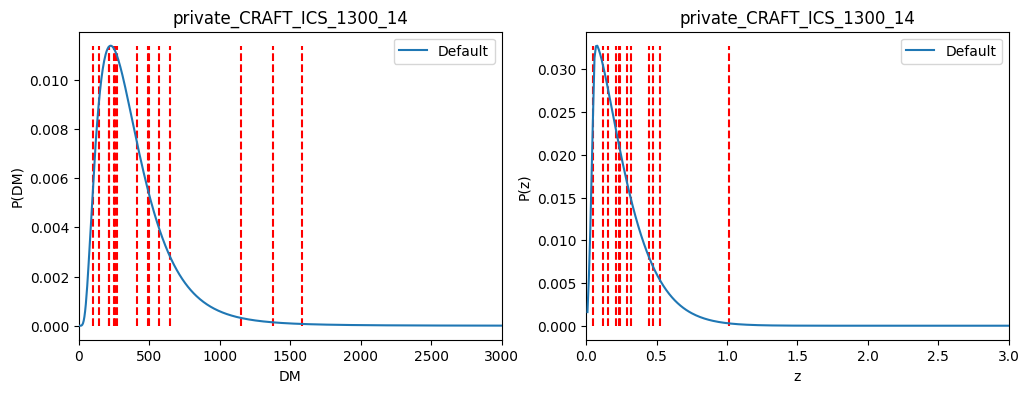

In [ ]:
llsum = np.zeros(len(survey_list))

for i in range(len(survey_list[0])):
    fig, axs = plt.subplots(1,2, figsize=[12,4])
    axs[0].set_title(survey_list[0][i].name)
    axs[1].set_title(survey_list[0][i].name)

    for j in range(len(survey_list)):
        s = survey_list[j][i]
        g = grid_list[j][i]

        # Calc pdm,pz
        rates=g.rates
        rates = rates/np.sum(rates)

        dmvals=g.dmvals
        pdm=np.sum(rates,axis=0)

        zvals=g.zvals
        pz=np.sum(rates,axis=1)
        
        pobs = it.get_log_likelihood(g,s,Pn=False, psnr=False)
        pobs2 = it.get_log_likelihood(g,s,Pn=False, psnr=True)
        print(s.name, labels[j], pobs, pobs2-pobs)
        llsum[j] += pobs2 - pobs
        
        min = s.SNRTHRESHs[0]
        max = np.max(s.SNRs)
        snrs = np.linspace(min,max, 50)
        psnr = get_psnr(snrs, s, g)
        print("psnr_tot", np.sum(psnr)*(snrs[1] - snrs[0]))

        # Plot
        axs[0].set_xlabel("DM")
        axs[0].set_ylabel("P(DM)")
        axs[0].set_xlim(xmax=3000)
        axs[0].vlines(s.DMEGs, np.zeros(len(s.DMs)), np.max(pdm)*np.ones(len(s.DMs)), ls='--', colors='r')
        axs[0].plot(dmvals, pdm, label=labels[j], zorder=10)

        axs[1].set_xlabel("z")
        axs[1].set_ylabel("P(z)")
        axs[1].set_xlim(xmax=3.0)
        axs[1].vlines(s.Zs, np.zeros(len(s.Zs)), np.max(pz)*np.ones(len(s.Zs)), ls='--', colors='r')
        axs[1].vlines(s.ignored_Zs, np.zeros(len(s.ignored_Zs)), np.max(pz)*np.ones(len(s.ignored_Zs)), ls='--', colors='c')
        axs[1].plot(zvals, pz, label=labels[j], zorder=10)

    axs[0].legend()
    axs[1].legend()

print(labels)
print(llsum)

private_CRAFT_ICS_1300_14
[0.3214   0.4755   0.291    0.1178   0.522    0.2365   0.243    0.214
 0.046946 1.016    0.45     0.157   ] [ 271.9   498.8   257.2   252.3   488.    416.2   214.6   645.6   142.33
 1377.1   566.1   216.4 ]


/fred/oz002/jhoffmann/FRB_library/zdm/zdm/misc_functions.py:2727: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)


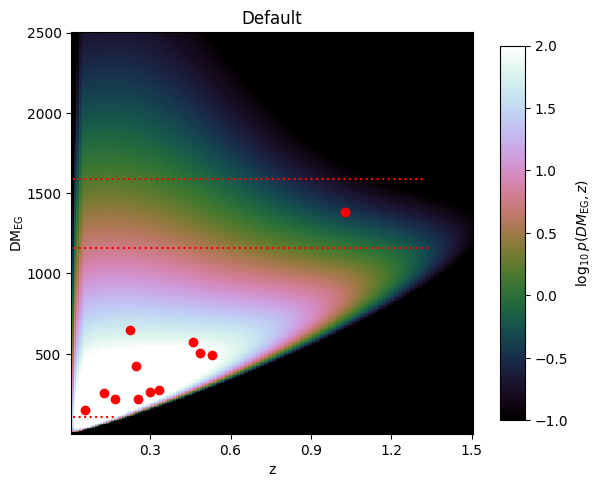

In [ ]:
j = 0
print(survey_list[0][j].name)

for i in range(len(grid_list)):
    
    g = grid_list[i][j]
    
    if survey_list[i][j].zlist is None:
        Zs = None
        DMs = None
    else:
        Zs = survey_list[i][j].Zs[survey_list[i][j].zlist]
        DMs = survey_list[i][j].DMEGs[survey_list[i][j].zlist]

    print(Zs, DMs)

    plot_grid_2(
            zDMgrid=g.rates,
            zvals=g.zvals,
            dmvals=g.dmvals,
            zmax=1.5,
            DMmax=2500,
            norm=0,
            log=True,
            project=False,
            conts=False,
            showplot=True,
            save=False,
            title=labels[i],
            DMlines=survey_list[i][j].DMEGs[survey_list[i][j].nozlist],
            FRBZ=Zs,
            FRBDM=DMs
        )